In [1]:
# SETUP pyDR
import os
os.chdir('../..')

In [2]:
#Imports / download
import pyDR

In [3]:
# Project Creation and File loading
proj=pyDR.Project()

sel=pyDR.MolSelect(topo='pyDR/examples/HETs15N/backboneB.pdb',
                   traj_files='pyDR/examples/HETs15N/backboneB.xtc',
                   project=proj)  #Selection object

# Specify the bond select to analyze for MD
sel.select_bond('N')

In [4]:
sel.traj.step=10  #Take every tenth point for MD calculation (set to 1 for more accurate calculation)
pyDR.Defaults['ProgressBar']=False #Turns off the Progress bar (screws up webpage compilation)

pyDR.md2data(sel,rank=1) #Direct calculation
ired=pyDR.md2iRED(sel,rank=1)  #iRED object
ired.iRED2data() #Send iRED results to proj

r:IREDMODE:rk1:backboneB with 70 data points


In [5]:
proj['raw'].detect.r_no_opt(10)
proj['raw'].fit()

Fitted 2 data objects
pyDIFRATE project with 2 data sets

Titles:
n10:MD:rk1:backboneB
n10:IREDMODE:rk1:backboneB


In [6]:
proj['no_opt'].detect.r_auto(7)
proj['no_opt'].fit().opt2dist(rhoz_cleanup=True)

Fitted 2 data objects


Optimized 2 data objects
pyDIFRATE project with 2 data sets

Titles:
o7:MD:rk1:backboneB
o7:IREDMODE:rk1:backboneB


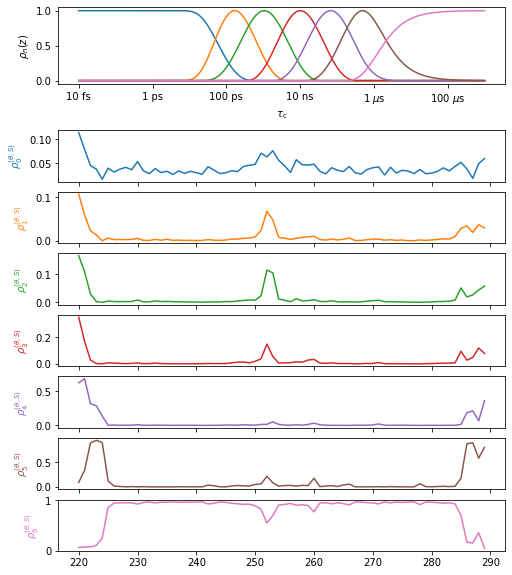

In [7]:
proj.close_fig('all')
proj['opt_fit']['MD'].plot().fig.set_size_inches([8,10])

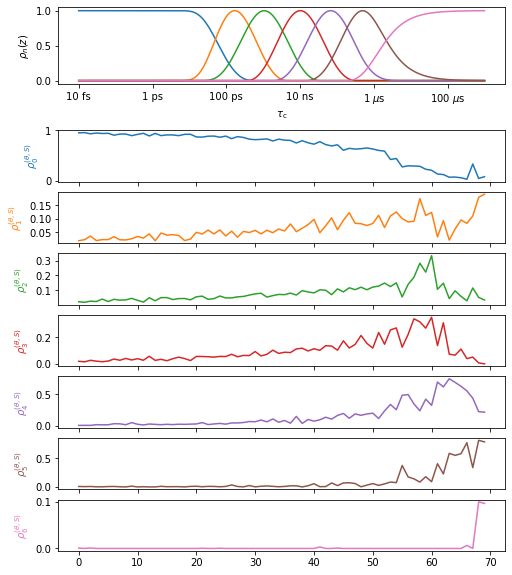

In [8]:
proj.close_fig('all')
proj['opt_fit']['iREDmode'].plot().fig.set_size_inches([8,10])

In [9]:
proj['opt_fit'].modes2bonds()

Converted 1 iRED data objects from modes to bonds
pyDIFRATE project with 1 data sets

Titles:
o7:IREDBOND:rk1:backboneB


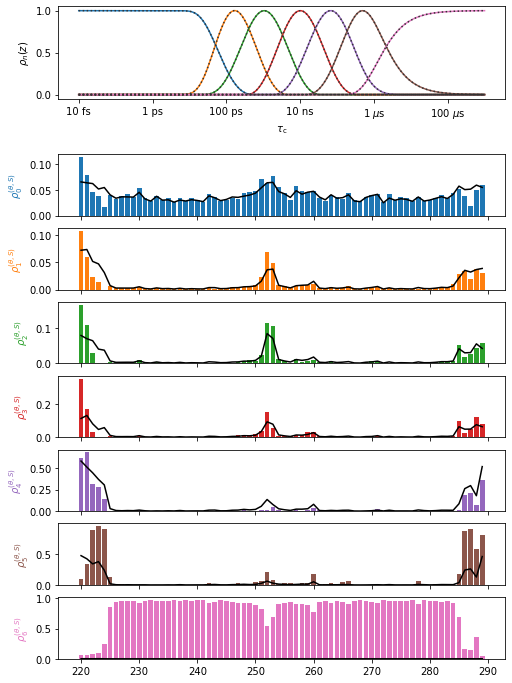

In [10]:
proj.close_fig('all')
proj['opt_fit']['MD'].plot(style='bar').fig.set_size_inches([8,12])
proj['opt_fit']['iREDbond'].plot()
# for a in proj.plot_obj.ax:a.set_ylim([0,.05])

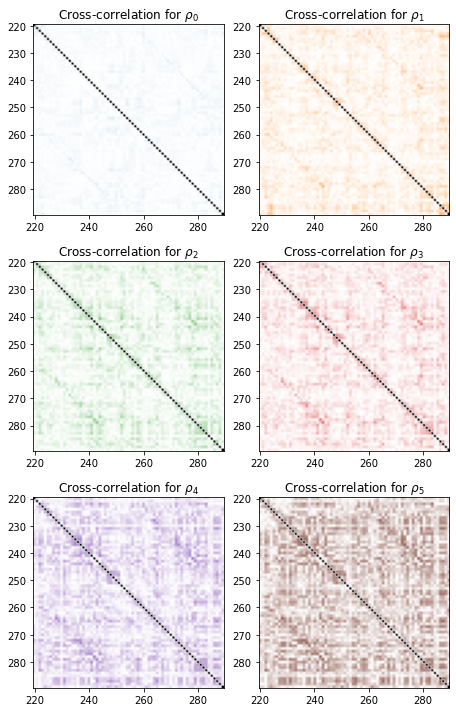

In [11]:
import numpy as np
fig=proj['opt_fit']['iREDbond'].plot_CC(rho_index=np.arange(6))[0].figure
fig.set_size_inches([12,10])
fig.tight_layout()

In [12]:
# proj.chimera.close()
proj['iREDbond'][-1].CCchimera()
proj.chimera.command_line(['set bgColor white','lighting soft','~show ~@N,C,CA,H,N'])

0
